In [3]:
import pandas as pd
from pandas import DataFrame, Series
import sqlite3
import os

In [6]:
# Warmup: Do a few more problems from the previous

In [7]:
# this allows the full screen to be used
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Lecture 35: Bar plots

Learning Objecties:
- Make a bar plot from a Pandas Series
- Add features: x-label, y-label, title, gridlines, color to plot
- Set the index of a DataFrame certain column
- Create an 'other' column in a DataFrame


In [8]:
# Without this Jupyter notebook cannot display the "first" plot in older versions of Python / mathplotlib / jupyter
%matplotlib inline

### Helpful documentation and an overview of how Matplotlib works
https://matplotlib.org/stable/tutorials/introductory/usage.html


In [9]:
# matplotlib is a plotting module similar to MATLAB
import matplotlib
from matplotlib import pyplot as plt

# matplotlib is highly configurable, acts like a style sheet for Pandas Plots
# rc stands for runtime config, syntax is like a dictionary

#matplotlib.rcParams                        # show all parameters
#matplotlib.rcParams["font.size"]          # show current font size setting
matplotlib.rcParams["font.size"] = 18   # change current font size setting


## Bar plots: From a Series
The index is the x-label
The values are the height of each bar

### https://pandas.pydata.org/docs/reference/api/pandas.Series.plot.bar.html

<AxesSubplot:>

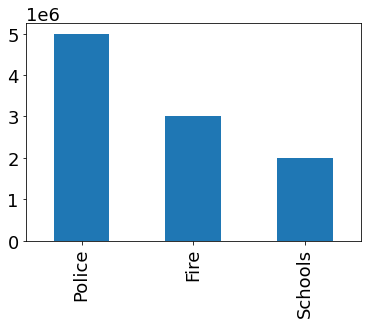

In [11]:
s = Series({"Police": 5000000, "Fire": 3000000, "Schools": 2000000})

# make a bar plot...notice the type
s.plot.bar()

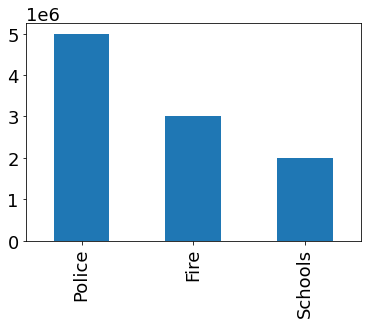

In [12]:
# if we store the returned object in a variable, we can configure the AxesSubplot
# typically the variable name used is 'ax'
ax = s.plot.bar() 

### How can we set the x-axis, y-axis labels, and title?
- use the Axes object

Text(0.5, 1.0, 'Annual City Spending')

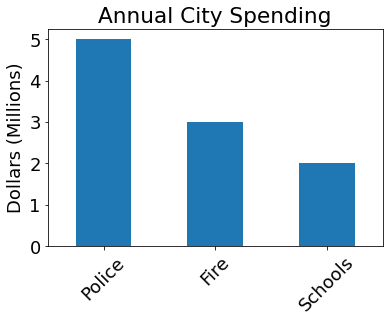

In [15]:
# better plot:
# instead of 1e6, divide all values in s by 1 million
ax = (s / 1000000).plot.bar()

# give the x ticklabels a rotation of 45 degrees
ax.set_xticklabels(list(s.index), rotation = 45)

# set the y_label to "Dollars (Millions)"
ax.set_ylabel("Dollars (Millions)")

# set the title to "Annual City Spending"
ax.set_title("Annual City Spending")

### How can we change the figure size?
- figsize keyword argument
- should be a tuple with two values: width and height (in inches)



Text(0.5, 1.0, 'Annual City Spending')

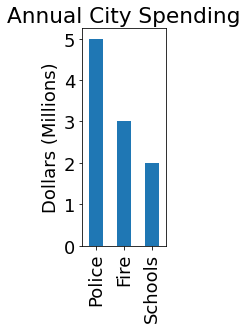

In [14]:
ax = (s / 1000000).plot.bar(figsize = (1.5, 4))
ax.set_ylabel("Dollars (Millions)")
ax.set_title("Annual City Spending")

### How can we make the bars horizontal?
### https://pandas.pydata.org/docs/reference/api/pandas.Series.plot.barh.html
- switch figsize arguments
- change y-label to x-label

Text(0.5, 1.0, 'Annual City Spending')

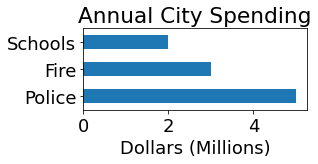

In [16]:
# paste the previous code cell here and modify
ax = (s / 1000000).plot.barh(figsize = (4, 1.5))
ax.set_xlabel("Dollars (Millions)")
ax.set_title("Annual City Spending")

### Change bar color by using the argument color= ' ' 
<pre>
- plot.bar(figsize = (width,height ) , color = ??? )
- 8 standard colors: r, g, b, c, m, y, k, w    color = 'c'  cyan
- can use value of grey between 0 and 1        color = 0.6
- can use a tuple (r,g,b) between 0 and 1      color = (0, .3, .4)
</pre>

In [ ]:
# color as a single char
ax = (s / 1000000).plot.barh(figsize = (4, 1.5), color='c')
ax.set_xlabel("Dollars (Millions)")
ax.set_title("Annual City Spending")

In [ ]:
# color as a value of grey

In [ ]:
# color as tuple of (r,g,b)
ax = (s / 1000000).plot.barh(figsize = (4, 1.5), color=(.2, .5, 0))
ax.set_xlabel("Dollars (Millions)")
ax.set_title("Annual City Spending")

### How can we mark gridlines?
- use ax.grid()

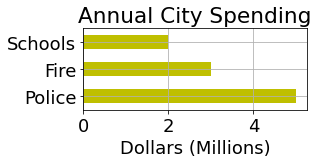

In [19]:
# copy the previous code and add grid lines
ax = (s / 1000000).plot.barh(figsize = (4, 1.5), color='y')
ax.set_xlabel("Dollars (Millions)")
ax.set_title("Annual City Spending")
ax.grid()

## Examples with the Bus Route Database

In [20]:
path = "bus.db"
assert os.path.exists(path)
conn = sqlite3.connect(path)

### Recap on exploring SQL database


In [21]:
pd.read_sql("""
SELECT * from
sqlite_master""", conn)

,type,name,tbl_name,rootpage,sql
0,table,boarding,boarding,2,"CREATE TABLE ""boarding"" (\n""index"" INTEGER,\n ..."
1,index,ix_boarding_index,boarding,3,"CREATE INDEX ""ix_boarding_index""ON ""boarding"" ..."
2,table,routes,routes,55,"CREATE TABLE ""routes"" (\n""index"" INTEGER,\n ""..."
3,index,ix_routes_index,routes,57,"CREATE INDEX ""ix_routes_index""ON ""routes"" (""in..."


In [22]:
pd.read_sql("""
SELECT * from
boarding""", conn)

,index,StopID,Route,Lat,Lon,DailyBoardings
0,0,1163,27,43.073655,-89.385427,1.03
1,1,1163,47,43.073655,-89.385427,0.11
2,2,1163,75,43.073655,-89.385427,0.34
3,3,1164,6,43.106465,-89.340021,10.59
4,4,1167,3,43.077867,-89.369993,3.11
...,...,...,...,...,...,...
3967,3967,6533,67,43.057329,-89.510756,16.88
3968,3968,6539,15,43.064361,-89.517233,15.53
3969,3969,6541,3,43.049934,-89.478167,2.56
3970,3970,6543,70,43.093289,-89.501726,0.11


##### What are the top routes, and how many people ride them daily?

In [23]:
df = pd.read_sql("""
SELECT Route, SUM(DailyBoardings) AS daily
FROM boarding
GROUP BY Route
ORDER BY daily DESC
""", conn)
df

,Route,daily
0,80,10211.79
1,2,4808.03
2,6,4537.02
3,10,4425.23
4,3,2708.55
5,4,2656.99
6,15,2179.98
7,38,1955.85
8,28,1868.31
9,5,1634.69


#### Let's take the daily column out as a Series ...

<AxesSubplot:>

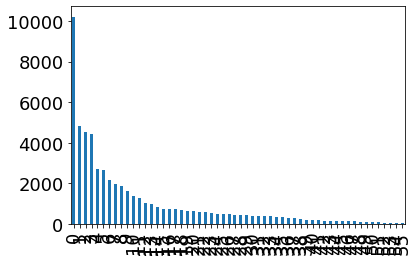

In [24]:
s = df["daily"]
s.plot.bar()

### Oops, too much data. Let's filter down to top 5 routes. How can we do that in SQL?

In [25]:
df = pd.read_sql("""
SELECT Route, SUM(DailyBoardings) AS daily
FROM boarding
GROUP BY Route
ORDER BY daily DESC
LIMIT 5
""", conn)
df

,Route,daily
0,80,10211.79
1,2,4808.03
2,6,4537.02
3,10,4425.23
4,3,2708.55


<AxesSubplot:>

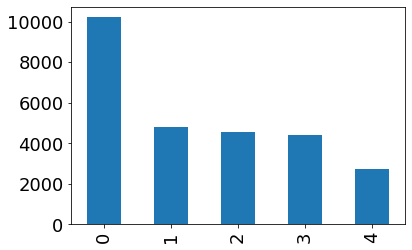

In [26]:
s = df["daily"]
s.plot.bar()

#### Huh, what exactly is route 0? Where is that coming from?
- Oops, it is coming from dataframe row index!
- Let's fix that: we can use df.set_index(...)

<AxesSubplot:xlabel='Route'>

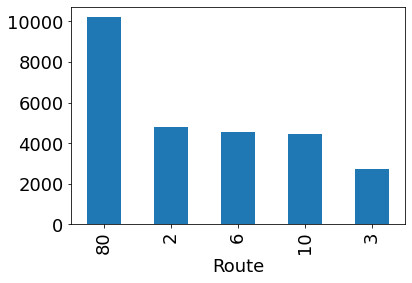

In [27]:
df = df.set_index("Route")
s = df["daily"]
s.plot.bar()

### Wouldn't it be nice to have an "other" bar to represent other routes?
- we have to now get rid of LIMIT clause
- we have to deal with other routes using pandas

In [28]:
df = pd.read_sql("""
SELECT Route, SUM(DailyBoardings) AS daily
FROM boarding
GROUP BY Route
ORDER BY daily DESC
""", conn)

df = df.set_index("Route")
s = df["daily"]
df.head()

,daily
Route,
80,10211.79
2,4808.03
6,4537.02
10,4425.23
3,2708.55


#### We are back to plotting all route bars ...

<AxesSubplot:xlabel='Route'>

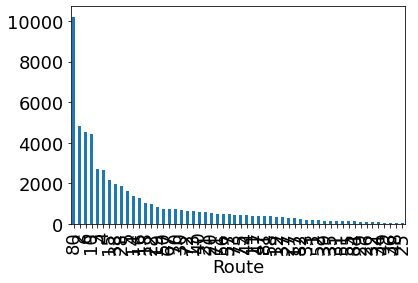

In [29]:
s.plot.bar()

### How can we slice a pandas dataframe?
- Recall that .iloc allows us to do slicing.
- For reproducing previous 5-route plot, we just need to take first 5 route details and populate into a series s.
- For the "other" part, we want all the rows in dataframe after row 5 summed up together.
- What should start and end in start:end be for getting the above two slices?
- Once we compute "other" count, we can add that back to the series s.

In [30]:
s = df["daily"].iloc[:5]
s["other"] = df["daily"].iloc[5:].sum()
s

Route
80       10211.79
2         4808.03
6         4537.02
10        4425.23
3         2708.55
other    29296.56
Name: daily, dtype: float64

<AxesSubplot:xlabel='Route'>

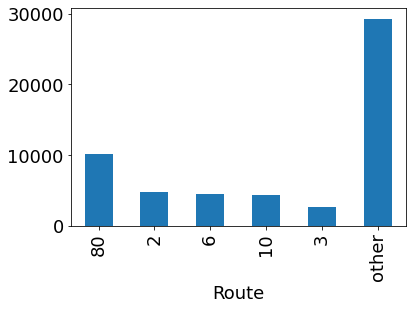

In [31]:
s.plot.bar()